In [1]:
from os import listdir, makedirs
from os.path import isfile, isdir, join
import cv2, copy, json, os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import PIL
import zipfile

In [2]:
from img_aug_refined import *

In [3]:
# CV_DeepLearning 폴더에 Acu_Dataset 폴더 생성 
if not (os.path.isdir('../CV_DeepLearning/Acu_Dataset')):
    os.mkdir('../CV_DeepLearning/Acu_Dataset')

In [5]:
# Acu_Dataset 폴더에 저장된 압축 파일들 푸는 과정 

dset_path = '../CV_DeepLearning/Acu_Dataset'
dset_list = os.listdir(dset_path)

for d in dset_list:
    d_zip_loc = os.path.join(dset_path,d)
    if zipfile.is_zipfile(d_zip_loc):
        d_zip = zipfile.ZipFile(d_zip_loc)
        d_zip.extractall(path = dset_path)
        os.remove(d_zip_loc)
        
# Acu_Dataset 폴더에 저장된 파일 및 디렉토리 필요에 맞게  정리 
#clean_and_rename_directory(dirlist=dset_path)

testing images


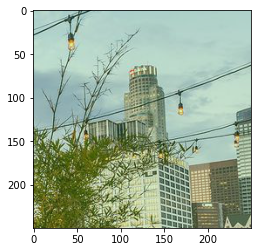

In [4]:
# cropping 할 배경 이미지 (aug) 리스트 
dir1 = './background-images/'
imdirs = os.listdir(dir1)
imlist = [ plt.imread(dir1 + i) for i in imdirs ]

###Quick Check ###
random_indx = np.random.randint(low = 0,high = 8, size = len(imlist))
print('testing images')
plt.imshow(rand_crop_img(imlist[random_indx[0]]))

In [7]:
os.chdir('../CV_DeepLearning')
os.getcwd()
# 'C:\\Users\\NormalKim\\[0_ACU_FINAL_0830]\\CV_DeepLearning'

'C:\\Users\\NormalKim\\[0_ACU_FINAL_0830]\\CV_DeepLearning'

In [8]:
kw = 'ekmoon'
folder_path = f'../CV_DeepLearning/Acu_Dataset/{kw}'
folder_ = os.listdir(folder_path)
bool_ind = ['.json' in k for k in folder_]

# open json data
json_file_name = np.array(folder_)[bool_ind][0]
json_file_path = os.path.join(folder_path, json_file_name )
json_data = open_json_file(json_file_path)

# get im directory 
#imdirectory = '../CV_DeepLearning/Acu_Dataset/taeyeon/org'
#org_list_name = os.listdir(imdirectory) # file names 


In [9]:
aug_cls = 'ekmoon'

In [ ]:
# 기존 데이터셋 -> 학습 데이터 5배 증가  
# filled data: 보통 5000장 ~ 40분

# org -> sctr
augment_hands(aug_cls, save_name = 'sctr', img_folder = 'org') 

# org -> rotated
augment_hands(aug_cls, save_name = 'rotated', img_folder = 'org')

# org -> filled
augment_hands(aug_cls, save_name = 'filled', img_folder = 'org', imlist = imlist) #

# rotated -> rotated + filled
augment_hands(aug_cls, save_name = 'rotated_filled', img_folder = 'rotated', 
               json_name = f'{aug_cls}_rotated', imlist = imlist, chg_flag = True)

# sctr -> sctr + filled 
augment_hands(aug_cls, save_name = 'sctr_filled', img_folder = 'sctr', 
               json_name = f'{aug_cls}_sctr',imlist = imlist, chg_flag = True)

starting:  ekmoon    rotated
completed 0 images to rotate
completed 100 images to rotate
completed 200 images to rotate
completed 300 images to rotate
completed 400 images to rotate
completed 500 images to rotate
completed 600 images to rotate
completed 700 images to rotate
completed 800 images to rotate
completed 900 images to rotate
completed 1000 images to rotate
completed 1100 images to rotate
completed 1200 images to rotate
completed 1300 images to rotate
completed 1400 images to rotate
completed 1500 images to rotate
completed 1600 images to rotate
completed 1700 images to rotate
completed 1800 images to rotate
completed 1900 images to rotate
completed 2000 images to rotate
completed 2100 images to rotate
completed 2200 images to rotate
completed 2300 images to rotate
completed 2400 images to rotate
completed 2500 images to rotate
completed 2600 images to rotate
completed 2700 images to rotate
completed 2800 images to rotate
completed 2900 images to rotate
completed 3000 images t

completed 2150 images to fill
completed 2160 images to fill
completed 2170 images to fill
completed 2180 images to fill
completed 2190 images to fill
completed 2200 images to fill
completed 2210 images to fill
completed 2220 images to fill
completed 2230 images to fill
completed 2240 images to fill
completed 2250 images to fill
completed 2260 images to fill
completed 2270 images to fill
completed 2280 images to fill
completed 2290 images to fill
completed 2300 images to fill
completed 2310 images to fill
completed 2320 images to fill
completed 2330 images to fill
completed 2340 images to fill
completed 2350 images to fill
completed 2360 images to fill
completed 2370 images to fill
completed 2380 images to fill
completed 2390 images to fill
completed 2400 images to fill
completed 2410 images to fill
completed 2420 images to fill
completed 2430 images to fill
completed 2440 images to fill
completed 2450 images to fill
